Number of files opened: 44
Total number of sequences after counting: 439902
Total number of knot type found: 188


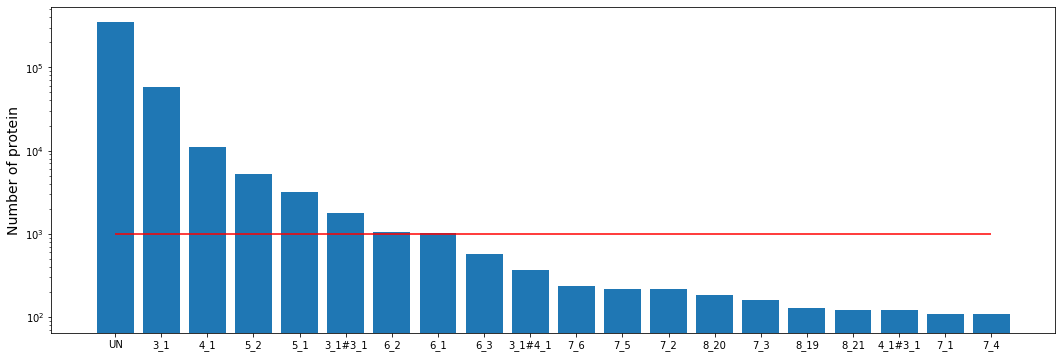

In [59]:
from os import listdir
from collections import Counter
import matplotlib.pyplot as plt

path_data = './data_extracted/'
files = sorted(listdir(path_data))
files_classified = [s for s in files if s.endswith('hhh.dat.ent')]

classes = Counter({})

for p in files_classified:
    
    knot_type = []
    
    with open(path_data + p, mode='r') as f:
        for line in f:
            knot_type.append(line.split()[2]) 
            
    classes = classes + Counter(knot_type)

# plot
k, n = [], []
cutoff = 100
for knot, number in classes.most_common():
    if number > cutoff:
        k.append(knot)
        n.append(number)
        
plt.figure(figsize=(18,6))
plt.yscale('log')
plt.ylabel('Number of protein', fontsize=14)
plt.bar(k,n)
plt.hlines(1000, k[0], k[-1], 'r')

# check
print(f'Number of files opened: {len(files_classified)}')
# ho notato che manca la sequenza numero 0039
print(f'Total number of sequences after counting: {sum(classes.values())}')
print(f'Total number of knot type found: {len(classes.keys())}')